# Capítulo 6: Análisis Exploratorio de Datos – Datos de FIRMS

En esta _notebook_ se encuentra el procedimiento para la generación de las visualizaciones
y estadísticas de los conjuntos de datos usados para este trabajo de tesis.

***

## Librerías y funciones necesarias

### Librerías

In [1]:
# ==== Manipulación de datos y cómputo científico ==== #
import numpy as np 
import scipy
import pandas as pd

# ==== Manejo de datos vectoriales ==== #
import geopandas as gpd 

# ==== Visualización de datos ==== #
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rc('font', family='serif')
plt.rc('axes', axisbelow=True)
import seaborn as sns

# ==== Visualización de mapas interactivos ==== #
import folium 

In [2]:
# ==== Librerías extras === #
import geoplot as gplt

### Funciones

In [3]:
# Prueba de Hipótesis -> Permutation test
def permutation_func(arr, nA, nB):
    n = nA + nB
    idxs = np.arange(n)
    idx_B = np.random.choice(idxs, size=nB,  replace=False)
    idx_A = np.setdiff1d(idxs, idx_B)
    return arr[idx_A].mean() - arr[idx_B].mean()

### Paleta de colores

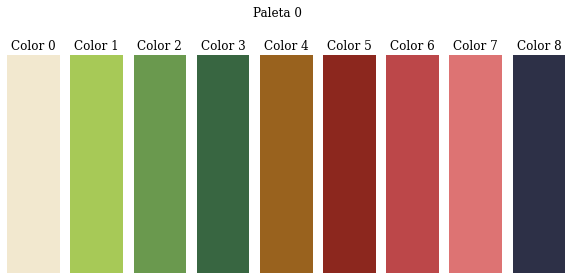

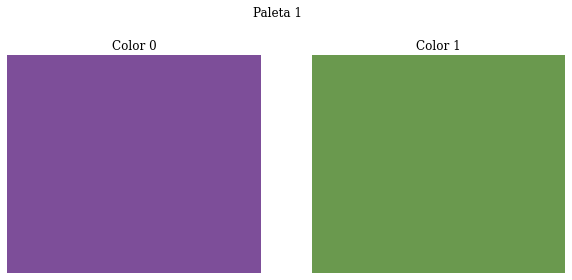

In [4]:
List_palette_01 = ['#F2E8CF', '#A7C957', '#6A994E', '#386641', '#99621E', '#8C271E', '#BC4749', '#DD7373', '#2D3047']
List_palette_02_binary = ['#7D4E99', '#6A994E']

List_all_palettes = [List_palette_01, List_palette_02_binary]
List_fig_palettes = []

num = 0
for palette in List_all_palettes:
    cols = len(palette)
    fig,axes = plt.subplots(nrows=1, ncols= cols, figsize=(10,4))
    k=0
    for ax in axes:
        ax.set_facecolor(palette[k])
        ax.tick_params(axis='both', which='both', length=0)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        fig.set_facecolor('white')
        fig.suptitle('Paleta {}'.format(num), y=1.05)
        ax.set_title('Color {}'.format(k))
        k += 1
    List_fig_palettes.append(fig)
    num += 1

## Cargar datos

In [5]:
df_firms = gpd.read_file('../datos/NASA/datos_firms_2001_2020.geojson')
df_firms['acq_date'] = pd.to_datetime(df_firms['acq_date'])
df_firms = df_firms.set_index('acq_date')

# Carga de poligono de Yucatán
yuc_info = gpd.read_file('../datos/31_yucatan/conjunto_de_datos/31ent.shp')
yuc_info = yuc_info.to_crs(4326)

# Carga polígonos de municipios del estado
municipios_geom_info = gpd.read_file('../datos/31_yucatan/conjunto_de_datos/31mun.shp')
municipios_geom_info = municipios_geom_info.to_crs(4326)

In [6]:
# Solo tipos 0 -> Vegetation fire
df_firms = df_firms[df_firms['type']==0]
print(f'Se cuentan con {df_firms.shape[0]} muestras en el conjuntos de datos')

Se cuentan con 85581 muestras en el conjuntos de datos


## Nivel de confianza en los puntos de calor

In [7]:
# Estadística Descriptiva

p = 0.05

media_confianza = df_firms['confidence'].mean()
mediana_confianza = df_firms['confidence'].median()
media_truncada_confianza = scipy.stats.trim_mean(df_firms['confidence'],p)
desviacion_estandar_confianza = df_firms['confidence'].std()
asimetria_confianza = scipy.stats.skew(df_firms['confidence'])

print(f'Confianza de las instancias del conjunto de datos')
print(f'\nMedia: {round(media_confianza,3)} %')
print(f'Mediana: {round(mediana_confianza,3)} %')
print(f'Media truncada (p={p}): {round(media_truncada_confianza,3)} %')
print(f'Desviación estándar: {round( desviacion_estandar_confianza, 3)} %')
print(f'Coeficiente de asimetría: {round(asimetria_confianza, 3)}')


Confianza de las instancias del conjunto de datos

Media: 71.76 %
Mediana: 73.0 %
Media truncada (p=0.05): 72.556 %
Desviación estándar: 17.464 %
Coeficiente de asimetría: -0.666


Las métricas descriptivas mostradas revelan una distribución que podría asemejarse a Gaussiana debido a una 
cercanía en los estimados de tendencia central y un coeficiente de asimetría que revela una ligera asimetría 
hacia la izquierda.

Text(0.42, 0.0, 'Registro de FIRMS durante el periodo de 2001 al 2020')

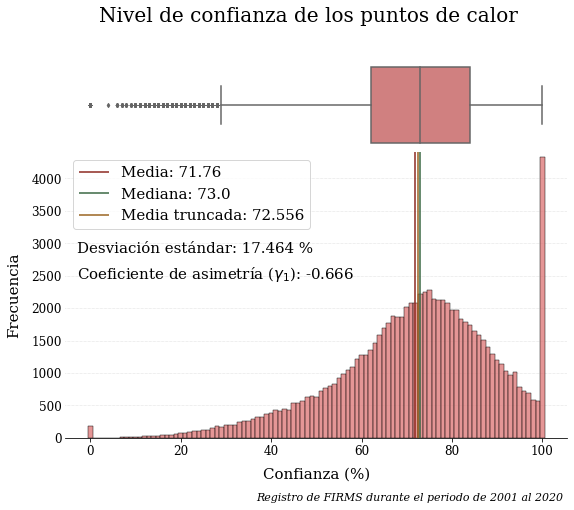

In [8]:
fig,(ax1,ax2) = plt.subplots(ncols=1,nrows=2,
                            figsize=(9,7),
                            gridspec_kw={'height_ratios':[0.25,0.75]},
#                            dpi=150,
                            sharex=True
                            )
fig.subplots_adjust(hspace=0.0)


sns.boxplot(data=df_firms, x='confidence',ax=ax1, color= List_palette_01[7], linewidth=1.5, fliersize=3)
sns.histplot(data=df_firms, x='confidence', ax=ax2, binwidth=1, discrete=True,color=List_palette_01[7])
ax2.vlines(x=media_confianza, ymin=0, ymax=4400, colors=List_palette_01[5], label=f'Media: {round(media_confianza,3)}')
ax2.vlines(x=mediana_confianza, ymin=0, ymax=4400, colors=List_palette_01[3], label=f'Mediana: {round(mediana_confianza,3)}')
ax2.vlines(x=media_truncada_confianza, ymin=0, ymax=4400, colors=List_palette_01[4],label=f'Media truncada: {round(media_truncada_confianza,3)}')
ax2.text(x=-3,y=2850,s=f'Desviación estándar: {round(desviacion_estandar_confianza,3)} %', fontdict={'size':15})
ax2.text(x=-3,y=2450,s=f'Coeficiente de asimetría ($\gamma_1$): {round(asimetria_confianza,3)}', fontdict={'size':15})


ax1.axis('off')
ax2.set_ylim(0,4400)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='y', which='both', length=0)
ax2.grid(visible = True, color='silver', alpha=1, ls=':', axis='y', lw=0.5)



fig.suptitle('Nivel de confianza de los puntos de calor', size=20)
ax2.set_xlabel('Confianza (%)', labelpad=10, size=15)
ax2.set_ylabel('Frecuencia', labelpad=10, size=15)
ax2.tick_params(axis='both', labelsize=12)
ax2.legend(loc=0, prop={'size':15})



caption = 'Registro de FIRMS durante el periodo de 2001 al 2020'
fig.text(0.42,0.0,caption,fontdict={'size':11, 'style':'italic'})

Como menciona el portal de [FAQ](https://earthdata.nasa.gov/faq/firms-faq) de FIRMS en la pregunta 
[_What is detection confidence?_](https://earthdata.nasa.gov/faq/firms-faq#ed-confidence), no hay una regla escrita 
para la selección de confianza con la que se desea trabajar, todo depende de la aplicación que se le esté dando a 
los datos. 

Para el desarrollo de esta sección del análisis exploratorio de datos se usa una confianza mayor–igual ( $\geq$ )al
tercer cuartil (Q3), es decir, trabajar con puntos de calor con **nivel de confianza arriba del 84%**.

In [9]:
q3_confianza_value = df_firms['confidence'].quantile(0.75)
df_firms = df_firms[df_firms['confidence'] > q3_confianza_value]

## Ubicación de puntos de calor

/Users/isaacarroyov/miniconda3/envs/GEE/lib/python3.8/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.85, 0.1, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS \ndurante el periodo de 2001 al 2020')

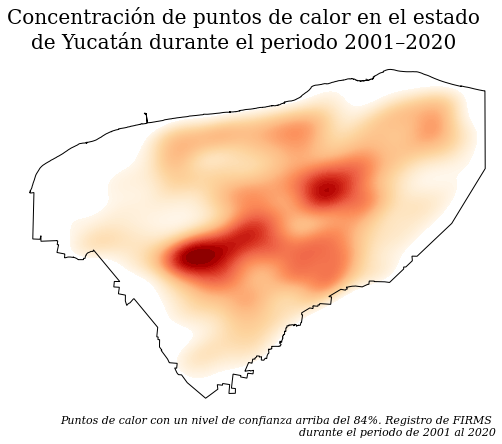

In [10]:
fig,ax=plt.subplots(
#    dpi=150,
    figsize=(10,7)
    )

sns.kdeplot(x= df_firms.geometry.x, y= df_firms.geometry.y, 
fill=True, 
thresh = 0.1, levels=100,
cmap='OrRd', ax=ax)

# Graficamos el polígono
gplt.polyplot(yuc_info, ax=ax, zorder=1)

ax.set_xlim(-90.5,-87.5)
ax.set_ylim(19.4,21.8)
ax.axis('off')

fig.suptitle('Concentración de puntos de calor en el estado\nde Yucatán durante el periodo 2001–2020', 
            size=20,y=0.95)

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS \ndurante el periodo de 2001 al 2020'
fig.text(0.85,0.1,caption, fontdict={'size':11,'style':'italic'}, ha='right')

## Registros a través del tiempo

In [11]:
df_firms_dayofyear_count = df_firms.resample('d').count()
df_firms_dayofyear_count['DayOfYear'] = df_firms_dayofyear_count.index.day_of_year + 1
df_firms_dayofyear_count['Year'] = df_firms_dayofyear_count.index.year

Text(0.9, 0, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de\nFIRMS durante el periodo de 2001 al 2020')

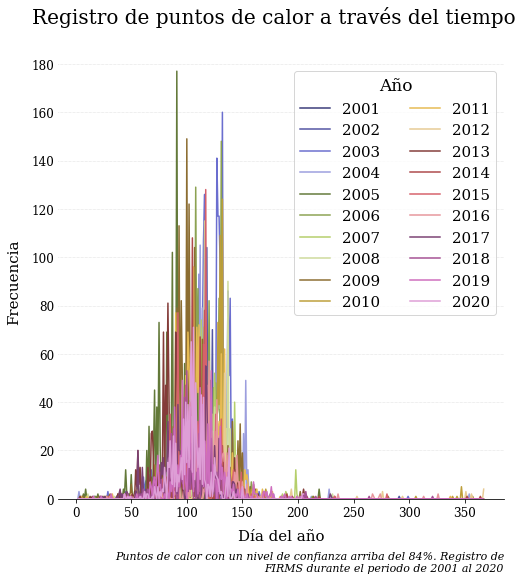

In [12]:
fig,ax = plt.subplots(figsize=(8,8),
#                      dpi=150
                      )

sns.lineplot(data=df_firms_dayofyear_count, x='DayOfYear', y='frp',
hue='Year', palette='tab20b',
ax=ax)

ax.set_ylim(0,180)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='y', lw=0.5)



fig.suptitle('Registro de puntos de calor a través del tiempo', size=20)
ax.set_ylabel('Frecuencia', labelpad=10, size=15)
ax.set_xlabel('Día del año', labelpad=10, size=15)
ax.tick_params(axis='both', labelsize=12)
ax.legend(prop={'size':15}, ncol=2, title='Año', title_fontsize=17)


caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de\nFIRMS durante el periodo de 2001 al 2020'
fig.text(0.9,0,caption, fontdict={'size':11,'style':'italic'}, ha='right')

Se puede notar que hay una ventana de tiempo de aproximadamente 100 días (entre el día 50 y el día 100 del año) 
donde se cuenta con un alto número de registros. Esta ventana se puede ver en todos los años, es una **variación estacional**.

Text(0.9, -0.08, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el\nperiodo de 2001 al 2020')

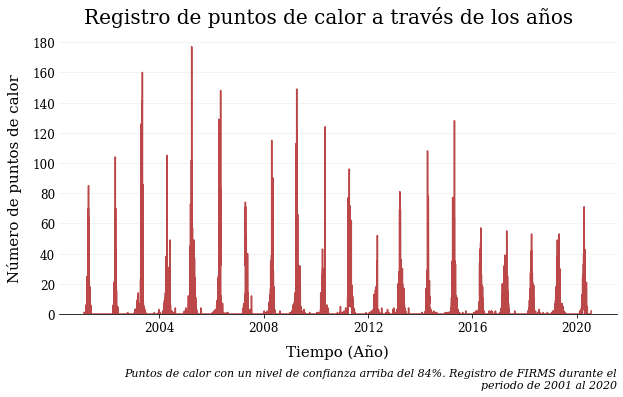

In [13]:
fig,ax = plt.subplots(figsize=(10,5),
#                      dpi=150
                      )

sns.lineplot( data = df_firms_dayofyear_count,
x=df_firms_dayofyear_count.index,
y ='frp',
color=List_palette_01[6]
)

ax.set_ylim(0,180)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='y', lw=0.5)


fig.suptitle('Registro de puntos de calor a través de los años', size=20)
ax.set_ylabel('Número de puntos de calor', labelpad=10, size=15)
ax.set_xlabel('Tiempo (Año)', labelpad=10, size=15)
ax.tick_params(axis='both', labelsize=12)

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el\nperiodo de 2001 al 2020'
fig.text(0.9,-0.08,caption, fontdict={'size':11,'style':'italic'}, ha='right')

In [14]:
df_firms_months_count = df_firms.groupby(df_firms.index.month).count()
df_firms_months_count.reset_index(inplace=True)

Text(0.9, 0, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante\nel periodo de 2001 al 2020')

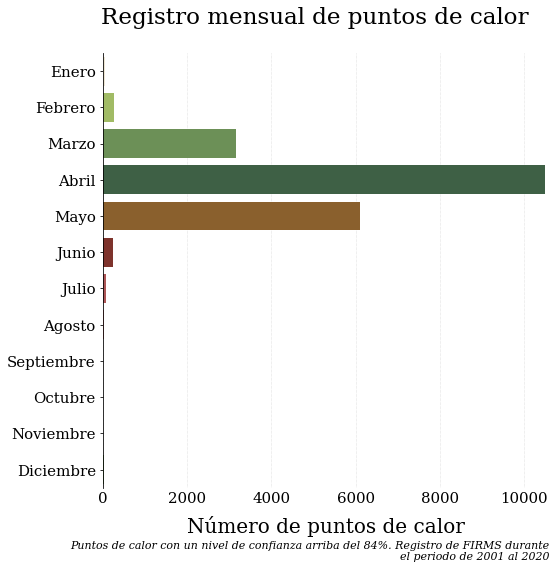

In [15]:
fig,ax = plt.subplots(figsize=(8,8),
#                      dpi=150
                      )

sns.barplot(data=df_firms_months_count, y='acq_date', x='frp', palette=List_palette_01, ax=ax, orient='h')


ax.set_xlim(0,10600)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', length=0)
ax.grid(visible = True, color='silver', alpha=1, ls=':', axis='x', lw=0.5)


fig.suptitle('Registro mensual de puntos de calor ', size=23, y=0.96)
ax.set_xlabel('Número de puntos de calor', labelpad=10, size=20)
ax.set_ylabel('')
ax.tick_params(axis='both', labelsize=15)
ax.set_yticklabels(['Enero', 'Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'])

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante\nel periodo de 2001 al 2020'
fig.text(0.9,0,caption, fontdict={'size':11,'style':'italic'}, ha='right')

In [16]:
df_firms_year_count = df_firms.resample('Y').count()
df_firms_year_count['Year'] = df_firms_year_count.index.year

# Solo se conservan dos columnas
df_firms_year_count = df_firms_year_count[['Year','frp']].rename(columns={'frp':'NumIncendios'})

In [17]:
corr_mat_year_numincendios = df_firms_year_count.corr()

Text(0.6, 0, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el periodo de 2001 al 2020')

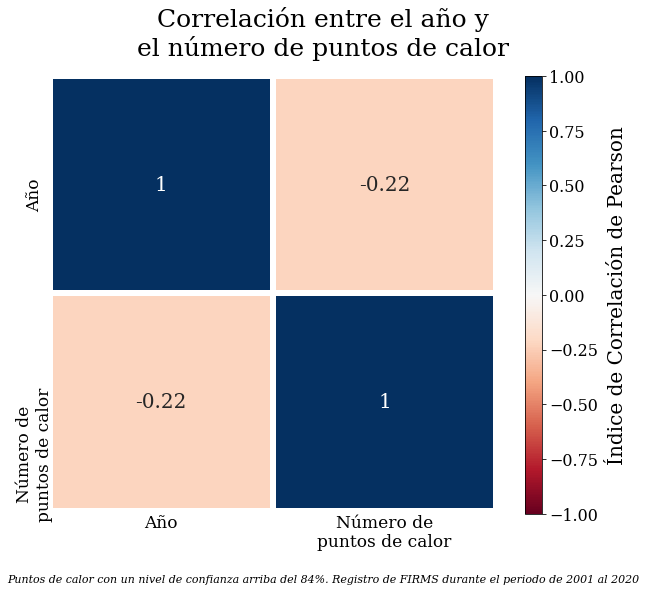

In [18]:
fig,ax = plt.subplots(figsize=(8,8),
#                      dpi=150
                      )

sns.heatmap(data=corr_mat_year_numincendios, vmin=-1, vmax=1, annot=True, annot_kws = {'size':20},
cmap = 'RdBu', cbar= False,  ax=ax, linewidth=5,
)
labels = ['Año', 'Número de\npuntos de calor']
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels(labels=labels, ha='center')
ax.set_yticklabels(labels=labels, ha='center')
ax.tick_params(axis='y', pad=15)

cax = fig.add_axes([0.95,0.12,0.03,0.76])
sm = plt.cm.ScalarMappable(cmap='RdBu', norm= plt.Normalize(vmin=-1, vmax= 1))
cbr = fig.colorbar(sm, cax=cax)

ax.tick_params(labelsize=17)
fig.suptitle('Correlación entre el año y\nel número de puntos de calor',x=0.6, y=1,size=25)
cbr.set_label('Índice de Correlación de Pearson', size=20, labelpad=10)
cbr.ax.tick_params(labelsize=16)

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el periodo de 2001 al 2020'
fig.text(0.6,0,caption, fontdict={'size':11,'style':'italic'}, ha='center')

Text(0.9, -0.1, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el\nperiodo de 2001 al 2020')

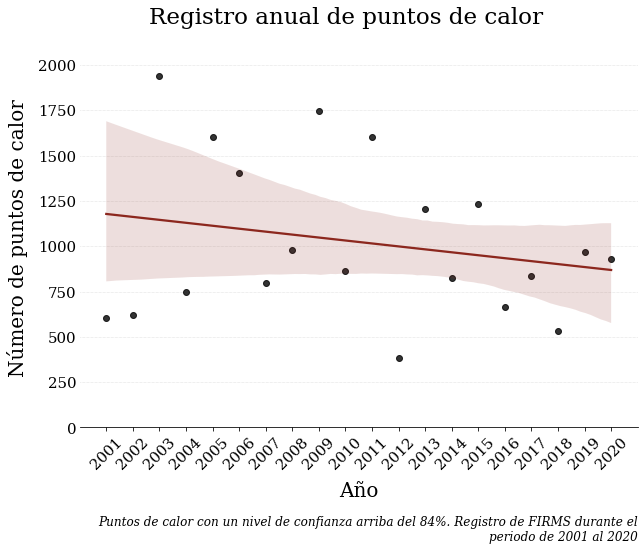

In [19]:
fig,ax = plt.subplots(figsize=(10,7),
#                      dpi=150
                      )


sns.regplot(data=df_firms_year_count, x='Year',y='NumIncendios', ax=ax,
line_kws={'color':f'{List_palette_01[5]}'}, scatter_kws={'color':'black'})

ax.set_ylim(0,2100)
ax.set_xlim(2000,2021)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='y', color='silver', alpha=1, ls=':', lw=0.5)


fig.suptitle('Registro anual de puntos de calor ', size=23, y=0.96)
ax.set_xlabel('Año', labelpad=10, size=20)
ax.set_ylabel('Número de puntos de calor', labelpad=10, size=20)
ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(np.arange(2001,2021))
ax.set_xticklabels(range(2001,2021))

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el\nperiodo de 2001 al 2020'
fig.text(0.9,-0.1,caption, fontdict={'size':12,'style':'italic'}, ha='right')

## Comparación de temperaturas

Existen dos atributos similares los cuales son **'brightness'** y **'bright_t31'**, que significan la temperatura
de la observación. Ambos atributos estan el escala Kelvin por lo que se hizo una conversión a grados Celsius.

In [20]:
df_firms['brightness'] = df_firms['brightness'] - 273.15
df_firms['bright_t31'] = df_firms['bright_t31'] - 273.15

In [21]:
p = 0.05

media_brightness = df_firms['brightness'].mean()
mediana_brightness = df_firms['brightness'].median()
media_truncada_brightness = scipy.stats.trim_mean(df_firms['brightness'],p)
desviacion_estandar_brightness = df_firms['brightness'].std()
asimetria_brightness = scipy.stats.skew(df_firms['brightness'])

print(f'Temperatura del atributo brightness:')
print(f'\nMedia: {round(media_brightness,3)} ˚C')
print(f'Mediana: {round(mediana_brightness,3)} ˚C')
print(f'Media truncada (p={p}): {round(media_truncada_brightness,3)} ˚C')
print(f'Desviación estándar: {round( desviacion_estandar_brightness, 3)} ˚C')
print(f'Coeficiente de asimetría: {round(asimetria_brightness, 3)}')

Temperatura del atributo brightness:

Media: 77.878 ˚C
Mediana: 72.95 ˚C
Media truncada (p=0.05): 76.232 ˚C
Desviación estándar: 17.383 ˚C
Coeficiente de asimetría: 1.965


In [22]:
media_bright_t31 = df_firms['bright_t31'].mean()
mediana_bright_t31 = df_firms['bright_t31'].median()
media_truncada_bright_t31 = scipy.stats.trim_mean(df_firms['bright_t31'],p)
desviacion_estandar_bright_t31 = df_firms['bright_t31'].std()
asimetria_bright_t31 = scipy.stats.skew(df_firms['bright_t31'])

print(f'Temperatura del atributo bright_t31:')
print(f'\nMedia: {round(media_bright_t31,3)} ˚C')
print(f'Mediana: {round(mediana_bright_t31,3)} ˚C')
print(f'Media truncada (p={p}): {round(media_truncada_bright_t31,3)} ˚C')
print(f'Desviación estándar: {round( desviacion_estandar_bright_t31, 3)} ˚C')
print(f'Coeficiente de asimetría: {round(asimetria_bright_t31, 3)}')

Temperatura del atributo bright_t31:

Media: 33.095 ˚C
Mediana: 33.25 ˚C
Media truncada (p=0.05): 33.146 ˚C
Desviación estándar: 6.112 ˚C
Coeficiente de asimetría: 0.167


Text(0.5, -0.1, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el\nperiodo de 2001 al 2020')

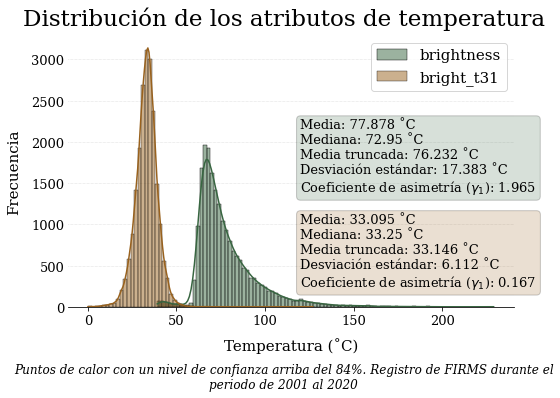

In [23]:
fig,ax = plt.subplots(figsize=(8,5),
#                      dpi=150
                      )


sns.histplot(data=df_firms, x='brightness',
kde=True, binwidth=2, ax=ax, color=List_palette_01[3],
label='brightness'
)
sns.histplot(data=df_firms, x='bright_t31',
kde=True, binwidth=2, ax=ax, color=List_palette_01[4],
label='bright_t31'
)
text_brightness_metrics = '\n'.join((
    f'Media: {round(media_brightness,3)} ˚C',
    f'Mediana: {round(mediana_brightness,3)} ˚C',
    f'Media truncada: {round(media_truncada_brightness,3)} ˚C',
    f'Desviación estándar: {round( desviacion_estandar_brightness, 3)} ˚C', 
    f'Coeficiente de asimetría ($\gamma_1$): {round(asimetria_brightness,3)}'
))
bbox_brightness_metrics = dict(boxstyle='round', facecolor=List_palette_01[3], alpha=0.2)
text_bright_t31_metrics = '\n'.join((
    f'Media: {round(media_bright_t31,3)} ˚C',
    f'Mediana: {round(mediana_bright_t31,3)} ˚C',
    f'Media truncada: {round(media_truncada_bright_t31,3)} ˚C',
    f'Desviación estándar: {round( desviacion_estandar_bright_t31, 3)} ˚C', 
    f'Coeficiente de asimetría ($\gamma_1$): {round(asimetria_bright_t31,3)}'
))
bbox_bright_t31_metrics = dict(boxstyle='round', facecolor=List_palette_01[4], alpha=0.2)


ax.text(x=120,y=1400,s=text_brightness_metrics, fontdict={'size':13}, bbox=bbox_brightness_metrics)
ax.text(x=120,y=250,s=text_bright_t31_metrics, fontdict={'size':13}, bbox=bbox_bright_t31_metrics)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='y', color='silver', alpha=1, ls=':', lw=0.5)



fig.suptitle('Distribución de los atributos de temperatura', size=23, y=0.96)
ax.set_xlabel('Temperatura (˚C)', labelpad=10, size=15)
ax.set_ylabel('Frecuencia', labelpad=10, size=15)
ax.tick_params(axis='both', labelsize=13)
ax.legend(loc='best', prop={'size':15})

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el\nperiodo de 2001 al 2020'
fig.text(0.5,-0.1,caption, fontdict={'size':12,'style':'italic'}, ha='center')

In [24]:
# ¿Se puede asumir que brightness > bright_t31?
# Prueba de hipótesis -> Permutation test
# H0 -> brightness (A) <= bright(B) --->  A -  B <= 0
# H1 -> A -  B > 0

# Se obtienen todos los valores
brightness_values = df_firms['brightness'].values
bright_t31_values = df_firms['bright_t31'].values

# La diferencias de las medias de las muestras
orig_diff = df_firms['brightness'].mean() - df_firms['bright_t31'].mean()

# Se juntan los datos
all_temperature_values = np.hstack((brightness_values, bright_t31_values))

# Tamaño de la muestra brightness
muestra_A = df_firms.shape[0]
# Tamaño de la muestra bright_t31
muestra_B = df_firms.shape[0]

# Se corre el exprimento 10,000 veces
differences_temps = np.array([ permutation_func(arr=all_temperature_values, nA=muestra_A, nB=muestra_B) for 
                             _ in range(10000)
                             ])

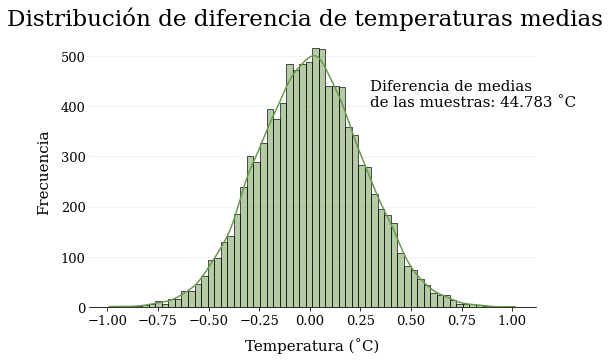

In [25]:
# La porción de área donde se encuentra el promedio de las muestras
# es muy pequeña -> un valor p muy pequeño -> rechazamos hipotesis nula

fig,ax = plt.subplots(figsize=(8,5),
#                      dpi=150
                      )

sns.histplot(differences_temps, ax=ax, color=List_palette_01[2], kde=True)
ax.text(x=0.3,y=400,
s=f'Diferencia de medias\nde las muestras: {round(orig_diff,3)} ˚C',
fontdict={'size':15}
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='y', color='silver', alpha=1, ls=':', lw=0.5)




fig.suptitle('Distribución de diferencia de temperaturas medias', size=23, y=0.96)
ax.set_xlabel('Temperatura (˚C)', labelpad=10, size=15)
ax.set_ylabel('Frecuencia', labelpad=10, size=15)
ax.tick_params(axis='both', labelsize=13)


In [26]:
df_firms_year_brightness_mean = df_firms.resample('Y').mean()
df_firms_year_brightness_mean['Year'] = df_firms_year_brightness_mean.index.year
# Solo se conservan dos columnas
df_firms_year_brightness_mean = df_firms_year_brightness_mean[['Year','brightness']]

corr_year_brightness = df_firms_year_brightness_mean.corr()

Text(0.6, 0, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el periodo de 2001 al 2020')

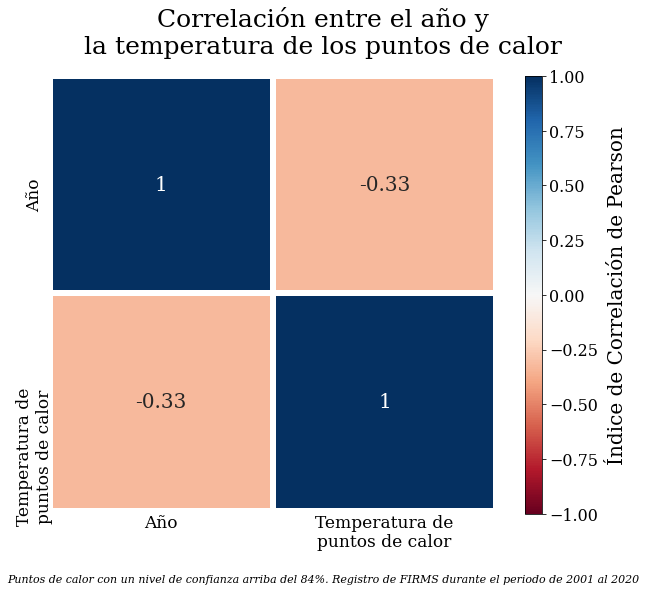

In [27]:
fig,ax = plt.subplots(figsize=(8,8),
#                      dpi=150
                      )

sns.heatmap(data=corr_year_brightness, vmin=-1, vmax=1, annot=True, annot_kws = {'size':20},
cmap = 'RdBu', cbar= False,  ax=ax, linewidth=5,
)
labels = ['Año', 'Temperatura de\npuntos de calor']
ax.tick_params(axis='both', which='both', length=0)
ax.set_xticklabels(labels=labels, ha='center')
ax.set_yticklabels(labels=labels, ha='center')
ax.tick_params(axis='y', pad=15)

cax = fig.add_axes([0.95,0.12,0.03,0.76])
sm = plt.cm.ScalarMappable(cmap='RdBu', norm= plt.Normalize(vmin=-1, vmax= 1))
cbr = fig.colorbar(sm, cax=cax)

ax.tick_params(labelsize=17)
fig.suptitle('Correlación entre el año y\nla temperatura de los puntos de calor',x=0.6, y=1,size=25)
cbr.set_label('Índice de Correlación de Pearson', size=20, labelpad=10)
cbr.ax.tick_params(labelsize=16)

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el periodo de 2001 al 2020'
fig.text(0.6,0,caption, fontdict={'size':11,'style':'italic'}, ha='center')

Text(0.9, -0.1, 'Puntos de calor con un nivel de confianza arriba del 84%. Registro de FIRMS durante el\nperiodo de 2001 al 2020')

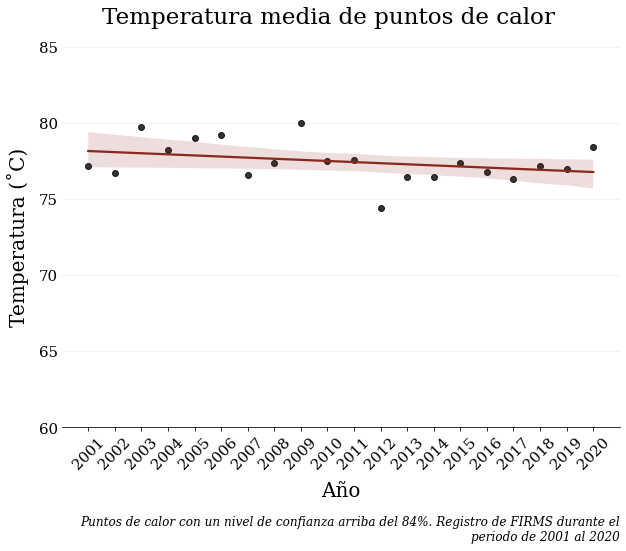

In [28]:
fig,ax = plt.subplots(figsize=(10,7),
#                      dpi=150
                      )


sns.regplot(data=df_firms_year_brightness_mean, x='Year',y='brightness', ax=ax,
line_kws={'color':f'{List_palette_01[5]}'}, scatter_kws={'color':'black'})

ax.set_ylim(60,85)
ax.set_xlim(2000,2021)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='y', color='silver', alpha=1, ls=':', lw=0.5)


fig.suptitle('Temperatura media de puntos de calor ', size=23, y=0.96)
ax.set_xlabel('Año', labelpad=10, size=20)
ax.set_ylabel('Temperatura (˚C)', labelpad=10, size=20)
ax.tick_params(axis='both', labelsize=15)
ax.tick_params(axis='x', rotation=45)
ax.set_xticks(np.arange(2001,2021))
ax.set_xticklabels(range(2001,2021))

caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%. Registro de FIRMS durante el\nperiodo de 2001 al 2020'
fig.text(0.9,-0.1,caption, fontdict={'size':12,'style':'italic'}, ha='right')

## Potencia Radiativa del Fuego

Text(0.5, -0.03, 'Puntos de calor con un nivel de confianza arriba del 84%.\nRegistro de FIRMS durante el periodo de 2001 al 2020')

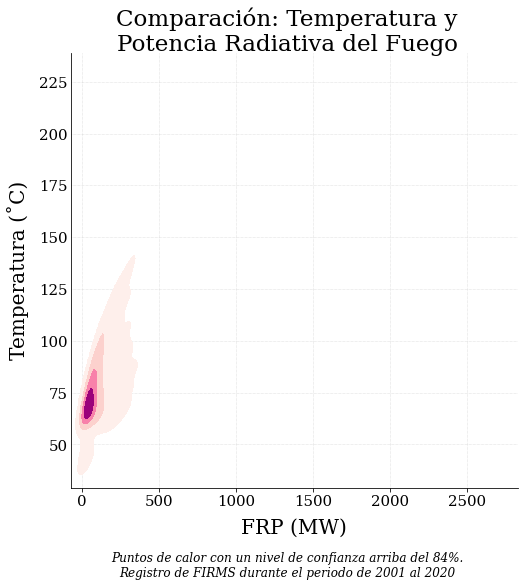

In [29]:
fig,ax = plt.subplots(figsize=(8,8),
#                      dpi=150
                      )

sns.kdeplot(data=df_firms, x='frp',y='brightness', fill=True, levels=5, ax=ax, cmap='RdPu')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)
ax.grid(visible = True, axis='both', color='silver', alpha=1, ls=':', lw=0.5)


fig.suptitle('Comparación: Temperatura y\nPotencia Radiativa del Fuego', size=23, y=0.96)
ax.set_ylabel('Temperatura (˚C)', labelpad=10, size=20)
ax.set_xlabel('FRP (MW)', labelpad=10, size=20)
ax.tick_params(axis='both', labelsize=15)


caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%.\nRegistro de FIRMS durante el periodo de 2001 al 2020'
fig.text(0.5,-0.03,caption, fontdict={'size':12,'style':'italic'}, ha='center')

## Comparación CONAFOR

In [30]:
df_conafor = gpd.read_file('../datos/CONAFOR/datos_conafor_2017.geojson')

/Users/isaacarroyov/miniconda3/envs/GEE/lib/python3.8/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.65, 0.05, 'Puntos de calor con un nivel de confianza arriba del 84%.')

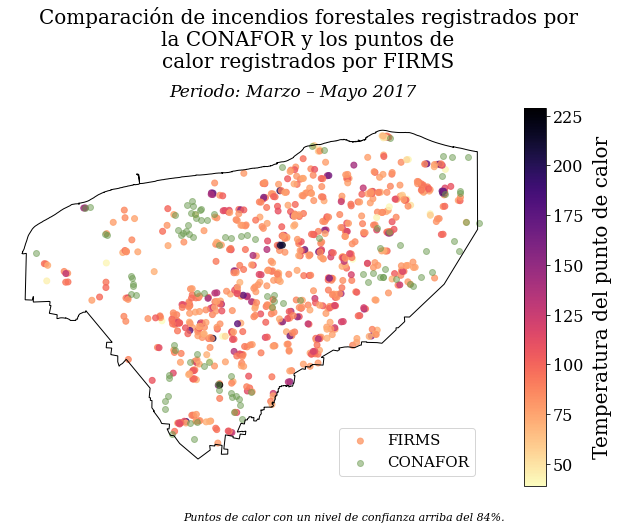

In [31]:
fig,ax=plt.subplots(
#    dpi=150,
    figsize=(10,7)
    )



df_firms.loc['2017-03':'2017-05'].plot('brightness',cmap='magma_r',legend=False,ax=ax, alpha=0.8, label='FIRMS')
df_conafor.plot(color=List_palette_01[2],ax=ax, alpha=0.5, label='CONAFOR')
gplt.polyplot(yuc_info, ax=ax, zorder=1)



cax = fig.add_axes([0.9,0.12,0.03,0.75])
sm = plt.cm.ScalarMappable(cmap='magma_r',
norm= plt.Normalize(vmin=df_firms.brightness.min(), vmax= df_firms.brightness.max()))
cbr = fig.colorbar(sm, cax=cax)


ax.set_xlim(-90.5,-87.5)
ax.set_ylim(19.4,21.8)
ax.axis('off')

fig.suptitle('Comparación de incendios forestales registrados por\nla CONAFOR y los puntos de\ncalor registrados por FIRMS', 
            size=20,y=1.07, x=0.6)
ax.set_title('Periodo: Marzo – Mayo 2017',size=17, position=(0.6,1), style='italic')
cbr.set_label('Temperatura del punto de calor', size=20, labelpad=10)
cbr.ax.tick_params(labelsize=16)
ax.legend(loc='lower right', prop=dict(size=15))


caption = f'Puntos de calor con un nivel de confianza arriba del {int(q3_confianza_value)}%.'
fig.text(0.65, 0.05,caption, fontdict={'size':11,'style':'italic'}, ha='center')